<a href="https://colab.research.google.com/github/eRuaro/prac-research/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/prac-research/actual/data/research-data-all.csv'

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(
    path,
    low_memory=False,
    parse_dates=['time']
)

df.head()

,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,precipitation,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
0,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 00:00:00,24.9,0,Cloudy,15.5,358,N,1011.55,0.92,88.9,65,27.6,0,0
1,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 00:00:00,24.7,0,Cloudy,24.8,22,NNE,1010.96,0.02,79.7,63,27.2,0,0
2,Makati,Manila,Philippines,121.03,14.57,2021-12-10 00:00:00,24.8,0,Clear,12.2,78,ENE,1013.88,0,67.3,10,26.3,0,0
3,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 01:00:00,24.9,0,Cloudy,15.4,358,N,1011.27,0.96,88.23,58,27.6,0,2
4,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 01:00:00,24.7,0,Cloudy,24.7,22,NNE,1010.72,0.02,76.93,64,27.2,0,2


In [ ]:
df.describe()

,longitude,latitude
count,6696.000000,6696.000000
mean,122.493333,11.860000
std,1.168629,1.923006
min,121.030000,10.310000
25%,121.030000,10.310000
50%,122.560000,10.700000
75%,123.890000,14.570000
max,123.890000,14.570000


In [ ]:
precipitation = df.pop('precipitation')

df.insert(0, 'precipitation', precipitation)

df.head()

,precipitation,name,region,country,longitude,latitude,time,temp_c,is_day,condition,wind_kph,wind_degree,wind_dir,air_pressure,relative_humidity,cloud,feelslike_c,will_it_rain,chance_of_rain
0,0.92,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 00:00:00,24.9,0,Cloudy,15.5,358,N,1011.55,88.9,65,27.6,0,0
1,0.02,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 00:00:00,24.7,0,Cloudy,24.8,22,NNE,1010.96,79.7,63,27.2,0,0
2,0,Makati,Manila,Philippines,121.03,14.57,2021-12-10 00:00:00,24.8,0,Clear,12.2,78,ENE,1013.88,67.3,10,26.3,0,0
3,0.96,Cebu,Cebu City,Philippines,123.89,10.31,2021-12-10 01:00:00,24.9,0,Cloudy,15.4,358,N,1011.27,88.23,58,27.6,0,2
4,0.02,Iloilo,Iloilo City,Philippines,122.56,10.70,2021-12-10 01:00:00,24.7,0,Cloudy,24.7,22,NNE,1010.72,76.93,64,27.2,0,2


In [35]:
def convert_to_float(x):
    new_x = []
    for i in x:
        y = float(i)
        new_x.append(y)
    
    return new_x

In [37]:
type(df['precipitation'][0])

str

In [43]:
df['precipitation'] = df['precipitation']._convert(numeric=True)
type(df['precipitation'][0])

numpy.float64

In [45]:
type(df['precipitation'][0])

numpy.float64

## Correlation Matrix

In [ ]:
corr = df.corr().round(3)

In [ ]:
corr.style.background_gradient()

,longitude,latitude
longitude,1.000000,-0.921000
latitude,-0.921000,1.000000


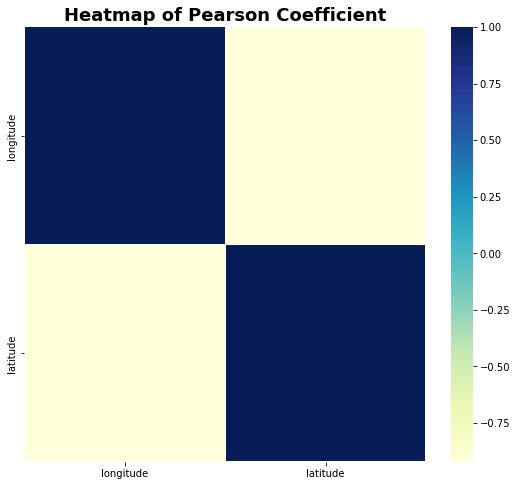

In [ ]:
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.title("Heatmap of Pearson Coefficient", fontweight='bold', fontsize=18)
plt.show();

### Scatter Plotting

#### Precipitation and Longitude, Latitude

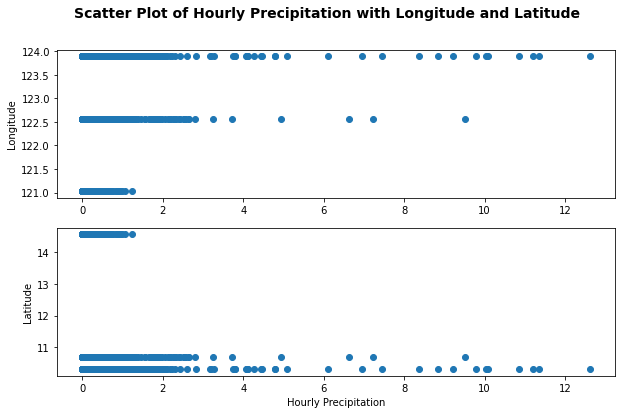

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Longitude and Latitude', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
longitude = df['longitude']._convert(numeric=True)
latitude = df['latitude']._convert(numeric=True)

ax1.scatter(precipitation, longitude)
ax1.set_ylabel('Longitude')

ax2.scatter(precipitation, latitude)
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Latitude')

plt.show()

#### Precipitation and Temperatures

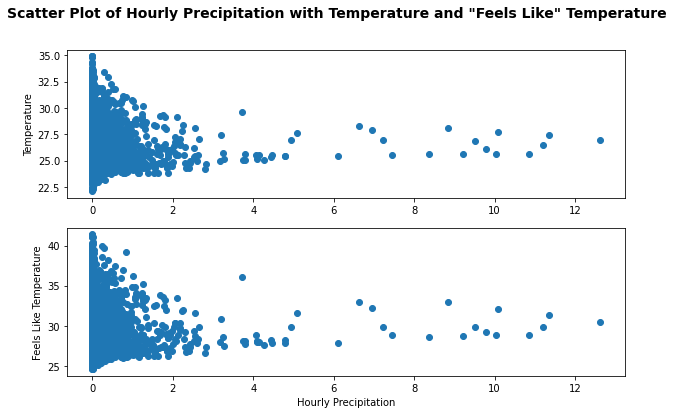

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Temperature and "Feels Like" Temperature', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
temp_c = df['temp_c']._convert(numeric=True)
feelslike_c = df['feelslike_c']._convert(numeric=True)

ax1.scatter(precipitation, temp_c)
ax1.set_ylabel('Temperature')

ax2.scatter(precipitation, feelslike_c)
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Feels Like Temperature')

plt.show()

#### Precipitation and Air Pressure, Relative Humidity

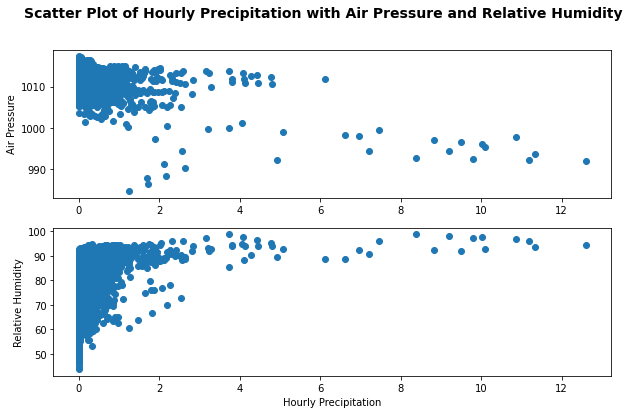

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Air Pressure and Relative Humidity', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
air_pressure = df['air_pressure']._convert(numeric=True)
relative_humidity = df['relative_humidity']._convert(numeric=True)

ax1.scatter(precipitation, air_pressure)
ax1.set_ylabel('Air Pressure')

ax2.scatter(precipitation, relative_humidity)
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Relative Humidity')

plt.show()

#### Precipitation and Wind Speed, Wind Direction

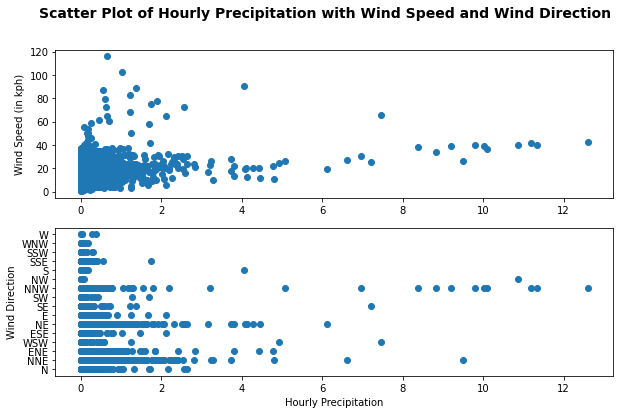

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Scatter Plot of Hourly Precipitation with Wind Speed and Wind Direction', fontweight='bold', fontsize=14)

precipitation = df['precipitation']._convert(numeric=True)
wind_kph = df['wind_kph']._convert(numeric=True)
# wind_dir = df['feelslike_c']._convert(numeric=True)

ax1.scatter(precipitation, wind_kph)
ax1.set_ylabel('Wind Speed (in kph)')

ax2.scatter(precipitation, df['wind_dir'])
ax2.set_xlabel('Hourly Precipitation')
ax2.set_ylabel('Wind Direction')

plt.show()